# Creating LDR folders

In [ ]:
import glob
import PIL
from PIL import Image
import subprocess as sp

count = 0
file_list = glob.glob('/misc/lmbraid18/bharadwk/data/data*/')

for paths in file_list:
    
    tmp_list = []    
    ldr = glob.glob('%s/*.png' %(paths))

    for items in ldr:
        
        subfolder = items.split('/')[6] 
        subfolder = subfolder.split('_')[0]        
        
        if '_cc' in items:
            subfolder = subfolder+'_CC'
            
        if subfolder not in tmp_list:            
            cmd = 'mkdir /misc/lmbraid18/bharadwk/scaled_data_ldr/%s' %(subfolder)
            sp.Popen(cmd, shell=True)            
            
        tmp_list.append(subfolder)

# Create hdr folders

In [ ]:
import glob
import subprocess as sp
file_list = glob.glob('/misc/lmbraid18/bharadwk/data/hdr/*')

for items in file_list:
    items = items.split('/')[6]
    items = items.split('.')[0]
    cmd = 'mkdir /misc/lmbraid18/bharadwk/scaled_data_hdr/%s' %(items)
    sp.Popen(cmd, shell=True)

# LDR IMAGE SCALING

In [ ]:
import PIL
from PIL import Image
import glob
import subprocess as sp

dir_list = []
dir_list = glob.glob('/misc/lmbraid18/bharadwk/data/data*')

for paths in dir_list:
    
    subfolder = paths.split('/')[5]    
    #cmd = 'mkdir /misc/lmbraid18/bharadwk/scaled_data/%s' %(subfolder)
    #sp.Popen(cmd, shell=True)
    #print(subfolder)
    #paths = paths+'*.png'    
    img_list = glob.glob("%s/*.png" %(paths))    
    new_img_list = []
    tmp_list = []

    for i in range(0,len(img_list)): 
        img_name = ''
        ximg_name = ''
        count = 0
        for j in range(0, len(img_list)):
            
            img_name = img_list[i].split('/')[6]            
            ximg_name = img_list[j].split('/')[6]
            
            if 'cc' in img_name:
                name_list = []
                name_list = img_name.split('_')
                img_name, shtspd = name_list[0], name_list[3]
                img_name = img_name + '_' + shtspd + '_CC'
            
            else:
                name_list = []
                name_list = img_name.split('_')
                img_name, shtspd = name_list[0], name_list[3]
                img_name = img_name + '_' + shtspd
            
            if 'cc' in ximg_name:
                xname_list = []
                xname_list = ximg_name.split('_')
                ximg_name, shtspd = xname_list[0], xname_list[3]
                ximg_name = ximg_name + '_' + shtspd + '_CC'
                
            else:
                xname_list = []
                xname_list = ximg_name.split('_')
                ximg_name, shtspd = xname_list[0], xname_list[3]
                ximg_name = ximg_name + '_' + shtspd            
            
            if img_name == ximg_name and ximg_name not in tmp_list:
                
                count = count + 1                
                image_name = ximg_name + '_' + str(count)
                new_img_list.append(image_name)
                
                #Resizing width:
                new_width  = 2080
                
                #Resizing height:
                new_height = 1408
                
                img = Image.open(img_list[j])
                #img = img.resize((new_width, new_height), Image.ANTIALIAS) 
                img.save('/misc/lmbraid18/bharadwk/scaled_data_ldr/%s/%s.png' %(ximg_name,image_name))
        
        tmp_list.append(img_name)

# HDR IMAGE SCALING

In [ ]:
import glob
import imageio
import numpy as np
imageio.plugins.freeimage.download()
from PIL import Image

xmin_list = []
xmax_list = []
files = glob.glob('/misc/lmbraid18/bharadwk/hdr_rendered_image/*/*.exr')
for paths in files:    
    #filename = paths.split('/')[6]    
    #filename = filename.split('.')[0]    
    img = cv2.imread(paths, cv2.IMREAD_ANYCOLOR | cv2.IMREAD_ANYDEPTH)    
    #arry = np.array(img, dtype=np.float32) 
    xmax_list.append(img.max())
    xmin_list.append(img.min())
    #arry.resize(2080, 1408, 3)
    #imageio.imwrite('/misc/lmbraid18/bharadwk/scaled_data_hdr/%s/%s.hdr' %(filename, filename), img)

In [ ]:
import imageio
img = imageio.imread("/misc/lmbraid18/bharadwk/scaled_data_hdr/S0160_CC/S0160_CC.hdr", format='HDR-FI')
#arry = np.array(img, dtype=np.float32)
#arry.resize(2080, 1408, 3)
#imageio.imwrite('/misc/lmbraid18/bharadwk/pfstools-2.0.6/build/src/pfsview/S0010_updated.hdr', arry)
print(img.max())
print(img.min())

# Normalize PNG (0,1)

In [ ]:
image = cv2.imread("/misc/lmbraid18/bharadwk/LDR_render_files/3DGRASSFIELD/image_1.png", cv2.IMREAD_COLOR)  # uint8 image
norm_image = np.zeros((800, 800))
norm_image = cv2.normalize(image, norm_image, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
print (norm_image)

# Create HDF5 for OpenExr files

In [381]:
import glob
import numpy as np
import cv2
import h5py
import os
import re

def keyFunc(afilename):
    nondigits = re.compile("\D")
    return int(nondigits.sub("", afilename))
    

ldr_files = glob.glob('/misc/lmbraid18/bharadwk/dataLDR/colorVar')
hdr_files =  glob.glob('/misc/lmbraid18/bharadwk/dataHDR/colorVar')

for items1 in ldr_files:
    for items2 in hdr_files:
        
        ldr_img = items1.split('/')[5]
        hdr_img = items2.split('/')[5]

        if ldr_img == hdr_img:

            PNGfiles = glob.glob ("/misc/lmbraid18/bharadwk/dataLDR/%s/*.JPG" %(ldr_img)) 
            EXRfiles = glob.glob ("/misc/lmbraid18/bharadwk/dataLDR/%s/*.exr" %(ldr_img)) 
            
            X_data1 = []
            arr_list = []
            name_list = []

            for pngFile in sorted(PNGfiles, key=keyFunc):                                        
                image1 = cv2.imread (pngFile)
                X_data1.append (image1)                
                for exrFile in sorted(EXRfiles, key=keyFunc):                                   
                    name = exrFile.split('/')[6]
                    if name not in name_list:                        
                        name_list.append(name)
                        image2 = cv2.imread(exrFile, cv2.IMREAD_ANYCOLOR | cv2.IMREAD_ANYDEPTH)                                                
                        X_data1.append (image2)                        
                        break                    

            X_data2 = np.array(np.dstack(X_data1), dtype=np.float32)
            X_data2 = np.swapaxes(X_data2, 0, 2)
            X_data2 = np.swapaxes(X_data2, 1, 2)
            arr_list.append(X_data2)
            im_array = np.array(arr_list, dtype=np.float32)            

            hdr_list = []            
            hdr_path = '/misc/lmbraid18/bharadwk/dataHDR/%s/hdr.exr' %(hdr_img)            
            hdr_image = cv2.imread(hdr_path, cv2.IMREAD_ANYCOLOR | cv2.IMREAD_ANYDEPTH)                        
            hdr_list.append(hdr_image)
            hdr_array = np.array(hdr_list, dtype=np.float32)
            hdr_array = np.swapaxes(hdr_array, 2, 3)
            hdr_array = np.swapaxes(hdr_array, 1, 2)

            with h5py.File('/misc/lmbraid18/bharadwk/workspace/ws1/projectimages_HDRLDR/%s.h5' %(hdr_img)) as hdf:

                D1 = hdf.create_dataset('data', data = im_array)
                D2 = hdf.create_dataset('hdr', data = hdr_array)

# Create HDF5 for shuffled LDR images

In [ ]:
import glob
import numpy as np
import cv2
import h5py
import os
import re
import random

def keyFunc(afilename):
    nondigits = re.compile("\D")
    return int(nondigits.sub("", afilename))
    

ldr_files = glob.glob('/misc/lmbraid18/bharadwk/LDR_render_files/*')
hdr_files =  glob.glob('/misc/lmbraid18/bharadwk/hdr_rendered_image/*')

for items1 in ldr_files:
    for items2 in hdr_files:
        
        ldr_img = items1.split('/')[5]
        hdr_img = items2.split('/')[5]

        if ldr_img == hdr_img:

            files = glob.glob ("/misc/lmbraid18/bharadwk/LDR_render_files/%s/*.png" %(ldr_img)) 
            X_data1 = []
            arr_list = []

            for myFile in sorted(files, key=keyFunc):

                image = cv2.imread (myFile)
                #image = cv2.imread(hdr_path, cv2.IMREAD_ANYCOLOR | cv2.IMREAD_ANYDEPTH)   
                X_data1.append (image)

            random.shuffle(X_data1)
            X_data2 = np.array(np.dstack(X_data1), dtype=np.float32)
            X_data2 = np.swapaxes(X_data2, 0, 2)
            X_data2 = np.swapaxes(X_data2, 1, 2)
            arr_list.append(X_data2)            
            im_array = np.array(arr_list, dtype=np.float32)            

            hdr_list = []            
            hdr_path = '/misc/lmbraid18/bharadwk/hdr_rendered_image/%s/hdr_image.exr' %(hdr_img)            
            hdr_image = cv2.imread(hdr_path, cv2.IMREAD_ANYCOLOR | cv2.IMREAD_ANYDEPTH)                        
            hdr_list.append(hdr_image)
            hdr_array = np.array(hdr_list, dtype=np.float32)
            hdr_array = np.swapaxes(hdr_array, 2, 3)
            hdr_array = np.swapaxes(hdr_array, 1, 2)

            with h5py.File('/misc/lmbraid18/bharadwk/workspace/ws1/new_training_set_shuffleLDR/%s.h5' %(hdr_img)) as hdf:

                D1 = hdf.create_dataset('data', data = im_array)
                D2 = hdf.create_dataset('hdr', data = hdr_array)

# Split LDR in 10 different datasets and create HDF5

In [ ]:
import glob
import numpy as np
import cv2
import h5py
import os
import re

def keyFunc(afilename):
    nondigits = re.compile("\D")
    return int(nondigits.sub("", afilename))
    

ldr_files = glob.glob('/misc/lmbraid18/bharadwk/test_LDR_render_files/*')
hdr_files =  glob.glob('/misc/lmbraid18/bharadwk/test_hdr_rendered_image/*')

for items1 in ldr_files:
    for items2 in hdr_files:
        
        ldr_img = items1.split('/')[5]
        hdr_img = items2.split('/')[5]

        if ldr_img == hdr_img:

            h5file = h5py.File('/misc/lmbraid18/bharadwk/workspace/ws1/new_test_set_split/%s.h5' %(hdr_img),'a')
            files = glob.glob ("/misc/lmbraid18/bharadwk/test_LDR_render_files/%s/*.png" %(ldr_img))        
            count = 0

            for myFile in sorted(files, key=keyFunc):

                count = count + 1
                X_data1 = []
                image = cv2.imread (myFile)
                X_data1.append (image)
                X_data1 = np.array(X_data1, dtype=np.float32)                
                X_data1 = np.swapaxes(X_data1, 2, 3)
                X_data1 = np.swapaxes(X_data1, 1, 2)           
            
                dataset = h5file.create_dataset('data%d' %(count), data = X_data1)

            if count == 10:                
                hdr_list = []            
                hdr_path = '/misc/lmbraid18/bharadwk/test_hdr_rendered_image/%s/hdr_image.exr' %(hdr_img)            
                hdr_image = cv2.imread(hdr_path, cv2.IMREAD_ANYCOLOR | cv2.IMREAD_ANYDEPTH)                        
                hdr_list.append(hdr_image)
                hdr_array = np.array(hdr_list, dtype=np.float32)
                hdr_array = np.swapaxes(hdr_array, 2, 3)
                hdr_array = np.swapaxes(hdr_array, 1, 2)                
                
                dataset2 = h5file.create_dataset('hdr', data = hdr_array)
            
            h5file.close()

# Split LDR in 10 different datasets and shuffle and create HDF5

In [ ]:
import glob
import numpy as np
import cv2
import h5py
import os
import re
import random

def keyFunc(afilename):
    nondigits = re.compile("\D")
    return int(nondigits.sub("", afilename))
    

ldr_files = glob.glob('/misc/lmbraid18/bharadwk/LDR_render_files/*')
hdr_files =  glob.glob('/misc/lmbraid18/bharadwk/hdr_rendered_image/*')

for items1 in ldr_files:
    for items2 in hdr_files:
        
        ldr_img = items1.split('/')[5]
        hdr_img = items2.split('/')[5]

        if ldr_img == hdr_img:

            h5file = h5py.File('/misc/lmbraid18/bharadwk/workspace/ws1/new_training_set_split_shuffleLDR/%s.h5' %(hdr_img),'a')
            files = glob.glob ("/misc/lmbraid18/bharadwk/LDR_render_files/%s/*.png" %(ldr_img))        
            random.shuffle(files)
            count = 0

            for myFile in files:

                count = count + 1
                X_data1 = []
                image = cv2.imread (myFile)
                X_data1.append (image)
                X_data1 = np.array(X_data1, dtype=np.float32)                
                X_data1 = np.swapaxes(X_data1, 2, 3)
                X_data1 = np.swapaxes(X_data1, 1, 2)           
            
                dataset = h5file.create_dataset('data%d' %(count), data = X_data1)

            if count == 10:                
                hdr_list = []            
                hdr_path = '/misc/lmbraid18/bharadwk/hdr_rendered_image/%s/hdr_image.exr' %(hdr_img)            
                hdr_image = cv2.imread(hdr_path, cv2.IMREAD_ANYCOLOR | cv2.IMREAD_ANYDEPTH)                        
                hdr_list.append(hdr_image)
                hdr_array = np.array(hdr_list, dtype=np.float32)
                hdr_array = np.swapaxes(hdr_array, 2, 3)
                hdr_array = np.swapaxes(hdr_array, 1, 2)                
                
                dataset2 = h5file.create_dataset('hdr', data = hdr_array)
            
            h5file.close()

# Split HDR candidates in 10 different datsets and create HDF5

In [ ]:
import glob
import numpy as np
import cv2
import h5py
import os
import re

def keyFunc(afilename):
    nondigits = re.compile("\D")
    return int(nondigits.sub("", afilename))
    

ldr_files = glob.glob('/misc/lmbraid18/bharadwk/test_LDR_render_files/*')
hdr_files =  glob.glob('/misc/lmbraid18/bharadwk/test_hdr_rendered_image/*')

for items1 in ldr_files:
    for items2 in hdr_files:
        
        ldr_img = items1.split('/')[5]
        hdr_img = items2.split('/')[5]

        if ldr_img == hdr_img:

            h5file = h5py.File('/misc/lmbraid18/bharadwk/workspace/ws1/new_test_set_HDRCandidate/%s.h5' %(hdr_img),'a')
            files = glob.glob ("/misc/lmbraid18/bharadwk/test_LDR_render_files/%s/*.exr" %(ldr_img))        
            count = 0

            for myFile in sorted(files, key=keyFunc):

                count = count + 1
                X_data1 = []
                image = cv2.imread(myFile, cv2.IMREAD_ANYCOLOR | cv2.IMREAD_ANYDEPTH)
                X_data1.append (image)
                X_data1 = np.array(X_data1, dtype=np.float32)                
                X_data1 = np.swapaxes(X_data1, 2, 3)
                X_data1 = np.swapaxes(X_data1, 1, 2)           
            
                dataset = h5file.create_dataset('data%d' %(count), data = X_data1)

            if count == 10:                
                hdr_list = []            
                hdr_path = '/misc/lmbraid18/bharadwk/test_hdr_rendered_image/%s/hdr_image.exr' %(hdr_img)            
                hdr_image = cv2.imread(hdr_path, cv2.IMREAD_ANYCOLOR | cv2.IMREAD_ANYDEPTH)                        
                hdr_list.append(hdr_image)
                hdr_array = np.array(hdr_list, dtype=np.float32)
                hdr_array = np.swapaxes(hdr_array, 2, 3)
                hdr_array = np.swapaxes(hdr_array, 1, 2)                
                
                dataset2 = h5file.create_dataset('hdr', data = hdr_array)
            
            h5file.close()

# Create HDF5 for .hdr files

In [42]:
import glob
import numpy as np
import cv2
import imageio
import h5py
import os
import re

imageio.plugins.freeimage.download()

def keyFunc(afilename):
    nondigits = re.compile("\D")
    return int(nondigits.sub("", afilename))
    

ldr_files = glob.glob('/misc/lmbraid18/bharadwk/dataLDR/realkitchen')
hdr_files =  glob.glob('/misc/lmbraid18/bharadwk/dataHDR/realkitchen')

for items1 in ldr_files:
    for items2 in hdr_files:
        
        ldr_img = items1.split('/')[5]
        hdr_img = items2.split('/')[5]

        if ldr_img == hdr_img:

            files = glob.glob ("/misc/lmbraid18/bharadwk/dataLDR/%s/*.JPG" %(ldr_img)) 
            X_data1 = []
            arr_list = []

            for myFile in sorted(files, key=keyFunc):

                image = cv2.imread (myFile)
                X_data1.append (image)

            X_data2 = np.array(np.dstack(X_data1), dtype=np.float32)
            X_data2 = np.swapaxes(X_data2, 2, 3)
            X_data2 = np.swapaxes(X_data2, 1, 2)
            arr_list.append(X_data2)
            im_array = np.array(arr_list)    

            hdr_list = []
            hdr_path = '/misc/lmbraid18/bharadwk/dataHDR/%s/%s.exr' %(hdr_img, hdr_img)
            #hdr_image = imageio.imread(hdr_path, format='HDR-FI')
            hdr_image = cv2.imread(hdr_path, cv2.IMREAD_ANYCOLOR | cv2.IMREAD_ANYDEPTH)
            hdr_list.append(hdr_image)
            hdr_array = np.array(hdr_list, dtype=np.float32)
            hdr_array = np.swapaxes(hdr_array, 2, 3)
            hdr_array = np.swapaxes(hdr_array, 1, 2)

            with h5py.File('/misc/lmbraid18/bharadwk/workspace/ws1/projectimages/%s.h5' %(hdr_img)) as hdf:

                D1 = hdf.create_dataset('data', data = im_array)
                D2 = hdf.create_dataset('hdr', data = hdr_array)

ValueError: bad axis2 argument to swapaxes

# Create the TRAINFILE list

In [ ]:
import glob

fo = open("/misc/lmbraid18/bharadwk/workspace/ws1/new_train_list.txt", "w")
file_list = glob.glob("/misc/lmbraid18/bharadwk/workspace/ws1/new_training_set/*.h5")
l_o_list = len(file_list)
#print l_o_list

for i in range (0,l_o_list):    
    fo.write(file_list[i])    
    fo.write('\n')
fo.close()

# Create the TESTFILE list

In [ ]:
import glob

fo = open("/misc/lmbraid18/bharadwk/workspace/ws1/new_test_list.txt", "w")
file_list = glob.glob("/misc/lmbraid18/bharadwk/workspace/ws1/new_test_set/*.h5")
l_o_list = len(file_list)
#print l_o_list

for i in range (0,l_o_list):    
    fo.write(file_list[i])    
    fo.write('\n')
fo.close()

# Find the MIN & MAX value of the .EXR files

In [ ]:
import cv2
import glob
import numpy as np

hdr_files =  glob.glob('/misc/lmbraid18/bharadwk/test_hdr_rendered_image/*')
fo = open('/misc/lmbraid18/bharadwk/workspace/test_min_max3.txt','a')
fo.write('{a:^0}{b:^50}{c:^50}'.format(a='Image Name', b='Min Value', c='Max Value'))
fo.write('\n\n')

for paths in hdr_files:
    xpaths = paths
    hdr_img = xpaths.split('/')[5]
    hdr_path = paths+'/hdr_image.exr'    
    hdr_image = cv2.imread(hdr_path, cv2.IMREAD_ANYCOLOR | cv2.IMREAD_ANYDEPTH)
    hdr_arr = np.array(hdr_image)  
    #print ("Min value", hdr_arr.min())
    #print ("Max value", hdr_arr.max())
    #print ("\n")
    fo.write('{:>0}'.format(str(hdr_img)))    
    fo.write('{:>50}'.format(str(hdr_arr.min())))
    fo.write('{:>50}'.format(str(hdr_arr.max())))
    fo.write('\n')
fo.close()

# Converting NAN values in .EXR to '0'

In [ ]:
import cv2
import math
import numpy as np

hdr_image = cv2.imread("/misc/lmbraid18/bharadwk/tmp1/Balcony5/hdr_image.exr", cv2.IMREAD_ANYCOLOR | cv2.IMREAD_ANYDEPTH)
hdr_array = np.array(hdr_image, dtype=np.float32)
hdr_array = np.nan_to_num(hdr_array)
cv2.imwrite('/misc/lmbraid18/bharadwk/tmp1/Balcony5/hdr_image.exr',hdr_array) 

# Normalize the MAX and MIN range

In [ ]:
L = min_list + max_list

max_val = max(L)
min_val = min(L)
diff = max_val - min_val
norm_list = []

for items in L:
    items = np.float32(items)
    x = (items - min_val)/diff
    norm_list.append(x)

# Plot loss for training data

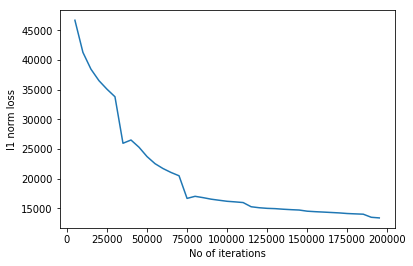

In [14]:
import glob
import matplotlib.pyplot as plt
import numpy as np

log_list = []
loss_list = []
mean_loss_list = []
count1 = 5000
count2 = 0
x_list = []

log_list = sorted(glob.glob('/misc/lmbraid18/bharadwk/workspace/ws1/hdr8-*.log'))

for items in log_list:    
    mean = 0.0
    loss_list = []
    filename = items.split('/')[6]     
    fo1 = open(items, 'r')
    filelist = fo1.readlines()
    for pos, xitems in enumerate(filelist):
        if 'Train net output' in xitems:
            count2 = count2 + 1
            loss = 0.0
            loss = filelist[pos].split('=')[1]            
            loss = loss.split('(')[0]            
            loss = float(loss)            
            loss_list.append(loss)
            
            if count2 == count1:
                x_list.append(count1)
                mean = np.mean(loss_list)
                mean_loss_list.append(mean)
                count1 = count1 + 5000

mean_loss_array = np.asarray(mean_loss_list)
x_list_array = np.asarray(x_list)
plt.plot(x_list, mean_loss_list)
plt.ylabel('l1 norm loss')
plt.xlabel('No of iterations')
plt.show()

# Compute PSNR

In [40]:
import cv2
import math
import numpy as np

refList = glob.glob("/misc/lmbraid18/bharadwk/workspace/ws1/testHDRImages/*.exr")
predList = glob.glob("/misc/lmbraid18/bharadwk/workspace/ws1/hdr_snapshot_iter/*.exr")
errEstList = []
print (len(refList), len(predList))
#for images in imgList:  
for predPath, refPath in zip(predList, refList):

    pred = cv2.imread(predPath, cv2.IMREAD_ANYCOLOR | cv2.IMREAD_ANYDEPTH)
    #pred = pred[0:468,0:628]
    #pred = pred[0:446,0:606]
    ref = cv2.imread(refPath, cv2.IMREAD_ANYCOLOR | cv2.IMREAD_ANYDEPTH)
    #ref = ref[0:468,0:628]
    #ref = ref[0:446,0:606]
    maxVal = ref.max()
    sqrdErr = np.sum((pred.astype("float") - ref.astype("float")) ** 2)/float(pred.shape[0] * pred.shape[1])
    errEst = 20*(np.log10(maxVal/sqrdErr))
    errEstList.append(errEst)  
    #print (errEst)

print(np.mean(errEstList))

75 75
55.4235247393


# Converting HDF5 to EXR

In [41]:
import numpy as np
import h5py
import cv2
import numpy as np
import matplotlib.pyplot as plt
import glob

h5Dir = glob.glob("/misc/lmbraid18/bharadwk/workspace/ws1/hdr_snapshot_iter/*.h5")

for h5s in h5Dir:    
    fileName = h5s.split('/')[7]
    fileName = fileName.split('.')[0]
    file    = h5py.File(h5s, 'r')
    dataset = file["prediction"]
    #dataset = file["hdr"]
    xdataset = np.array(dataset, dtype=np.float32)
    xdataset = np.swapaxes(xdataset, 1,3)
    xdataset = np.swapaxes(xdataset, 1,2)
    xdataset = np.squeeze(xdataset, axis=0)
    file.close()

    cv2.imwrite('/misc/lmbraid18/bharadwk/workspace/ws1/hdr_snapshot_iter/%s.exr' %(fileName),xdataset) 

# ToneMap the HDR to get PNG using OpenCV

In [63]:
EXRFiles = glob.glob("/misc/lmbraid18/bharadwk/workspace/ws1/hdr_snapshot_iter/*.exr")

for EXRs in EXRFiles:
    
    EXRName = EXRs.split('/')[7]
    EXRName = EXRName.split('.')[0]
    hdr_image = cv2.imread(EXRs, cv2.IMREAD_ANYCOLOR | cv2.IMREAD_ANYDEPTH)
    tonemap = cv2.createTonemap(gamma=1.3)
    #tonemap = cv2.createTonemapMantiuk(gamma=1.3)
    res = tonemap.process(hdr_image.copy())
    img = np.clip(res*255, 0, 255).astype('uint8')
    cv2.imwrite("/misc/lmbraid18/bharadwk/workspace/ws1/hdr_snapshot_iter/%s.jpg" %(EXRName), img)

# Different ToneMapping

In [ ]:
# Tonemap HDR image
hdr_path = '/misc/lmbraid18/bharadwk/workspace/ws1/hdr_snapshot_iter/score_iter_00012.h5.exr'
hdr_image = cv2.imread(hdr_path, cv2.IMREAD_ANYCOLOR | cv2.IMREAD_ANYDEPTH)
tonemap1 = cv2.createTonemapDurand(gamma=1.3)
res_debvec = tonemap1.process(hdr_image.copy())
tonemap2 = cv2.createTonemapDurand(gamma=1.3)
res_robertson = tonemap2.process(hdr_image.copy())

# Convert datatype to 8-bit and save
res_debvec_8bit = np.clip(res_debvec*255, 0, 255).astype('uint8')
res_robertson_8bit = np.clip(res_robertson*255, 0, 255).astype('uint8')
 
cv2.imwrite("/misc/lmbraid18/bharadwk/workspace/ws1/hdr_snapshot_iter/durand.jpg", res_debvec_8bit)
cv2.imwrite("/misc/lmbraid18/bharadwk/workspace/ws1/hdr_snapshot_iter_deformation_l2perloc/ldr_robertson.jpg", res_robertson_8bit)
#cv2.imwrite("fusion_mertens.jpg", res_mertens_8bit)

tonemap3 = cv2.createTonemapReinhard(gamma=1.3)
tonemap4 = cv2.createTonemapMantiuk(gamma=1.3)
tonemap5 = cv2.createTonemapDrago(gamma=1.3)
tonemap6 = cv2.createTonemap(gamma=1.3)

res1 = tonemap3.process(hdr_image.copy())
res2 = tonemap4.process(hdr_image.copy())
res3 = tonemap5.process(hdr_image.copy())
res4 = tonemap6.process(hdr_image.copy())

img1 = np.clip(res1*255, 0, 255).astype('uint8')
img2 = np.clip(res2*255, 0, 255).astype('uint8')
img3 = np.clip(res3*255, 0, 255).astype('uint8')
img4 = np.clip(res4*255, 0, 255).astype('uint8')

cv2.imwrite("/misc/lmbraid18/bharadwk/workspace/ws1/hdr_snapshot_iter/rerinhard.jpg", img1)
cv2.imwrite("/misc/lmbraid18/bharadwk/workspace/ws1/hdr_snapshot_iter/mantiuk.jpg", img2)
cv2.imwrite("/misc/lmbraid18/bharadwk/workspace/ws1/hdr_snapshot_iter/drago.jpg", img3)
cv2.imwrite("/misc/lmbraid18/bharadwk/workspace/ws1/hdr_snapshot_iter/normal.jpg", img4)

# Test all the caffe models in a sequence

In [ ]:
import glob
import sys, os

caffee_list = []
caffee_list = sorted(glob.glob('/misc/lmbraid18/bharadwk/workspace/ws1/hdr/*.caffemodel'))

for models in caffee_list:
    models = models.split('/')[7]
    cmd = "./hdr-test.sh models"
    os.system(cmd)

# Constructing a dictionary of no_of_iter to mean_loss_val

In [37]:
import glob
import numpy as np
import collections

log_file = []
file_list = []
loss_list_mean = {}

log_file = sorted(glob.glob('/misc/lmbraid18/bharadwk/workspace/ws1/testlogs/hdr_test_hdr_snapshot*.log'))

for logs in log_file:    
    fo = open(logs,"r")
    logs = logs.split('/')[7]
    logs = logs.split('_')[5]
    logs = logs.split('.')[0]
    file_list = fo.readlines()
    loss_list = []
    mean = 0.0
    
    for pos, xitems in enumerate(file_list):        
        if 'Successfully saved 1 blobs' in xitems:            
            
            pos = pos + 1
            tmp_str = file_list[pos]
            tmp_str = tmp_str.split('=')[1]
            loss_list.append(float(tmp_str))
        
    mean = np.mean(loss_list)    
    loss_list_mean.update({logs:mean})         

loss_list_mean = collections.OrderedDict(sorted(loss_list_mean.items(), key=lambda t: len(t[0])))

In [38]:
print (min(loss_list_mean.items(), key=lambda x: x[1])[0])
print (loss_list_mean.get('120000'))
#print (loss_list_mean.get('500000'))
#print (len(loss_list_mean.values()))
#print (loss_list_mean.values())

250000
0.128581168133


# Train error against Test error

In [26]:
import matplotlib.pylab as plt

list_keys = list(loss_list_mean.keys())
list_values = list(loss_list_mean.values())
#list_keys = list_keys[:20]
#list_values = list_values[0:20]
#print (list_values[0:40])
#print (list_values)
#keys_array = np.asarray(list_keys)
#value_array = np.asarray(list_values)
#plt.plot(keys_array, mean_loss_array, 'r')
#plt.plot(keys_array, value_array, 'g')
#plt.show()

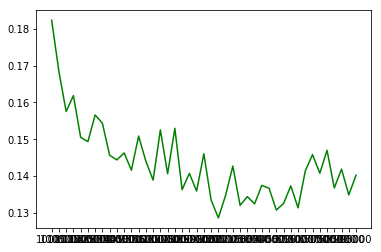

In [27]:
plt.plot(sorted(list_keys), list_values, 'g')
plt.show()
#plt.savefig("/misc/lmbraid18/bharadwk/workspace/ws1/hdr_test_logs_philaug/philaugtgtest.jpg")

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math
import glob

countRows = []
#countRows=np.array(countRows)
sigma = 500;
count = 5000
log_file = []
log_file = sorted(glob.glob('/misc/lmbraid18/bharadwk/workspace/ws1/hdr14*.txt'))

for network in log_file:    
    lossFile = network.split('/')[6]                
    loss = np.loadtxt(network, dtype=np.float32, delimiter= ',', skiprows=1, usecols=(0,3))    
    filter = np.exp(-4.0 * (np.arange(-4*sigma, 4*sigma + 1, 1) / sigma)**2) / (math.sqrt(2 * math.pi) * sigma)
    lossPadded = np.concatenate((np.ones(int(filter.shape[0] / 2)) * loss[0,1], loss[:,1], np.ones(int(filter.shape[0] / 2)) * loss[-1,1]))
    lossFiltered = np.convolve(lossPadded, filter, mode="valid")
    plt.plot(loss[:,0], lossFiltered, 'b', label='train error') 
    xloss = list(loss[:,0])
    countRows.append(xloss)
    plt.ylim(0, 0.20)
    plt.hold(True)

countRows = sum(countRows, [])
print(len(countRows))
newArr = np.zeros(len(countRows), dtype=np.float32)
for loss in list_values:        
    newArr[count-1] = loss
    count = count + 5000
#plt.plot(countRows, newArr, 'g', label='test error')
#plt.legend()
plt.show()


# Extra code for general purpose

In [ ]:
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import cv2
import numpy as np
import itertools

fo =  open('/misc/lmbraid18/bharadwk/workspace/ws1/new_train_list.txt','r')
hdr_files = fo.readlines()
#glob.glob('/misc/lmbraid18/bharadwk/hdr_rendered_image/*')
hdrARR = []

for items in hdr_files:
    dirName = items.split('/')[7]
    filename = dirName.split('.')[0]
    hdr_path = '/misc/lmbraid18/bharadwk/hdr_rendered_image/%s/hdr_image.exr' %(filename)
    hdr_image = cv2.imread(hdr_path, cv2.IMREAD_ANYCOLOR | cv2.IMREAD_ANYDEPTH)
    hdrARR.append(hdr_image)
    
hdr_array = np.array(hdrARR, dtype=np.float32)
finHdrARR = hdr_array.ravel()
#m3 = np.hstack((m1,m2))
#axes = plt.gca()
#axes.set_ylim([0,100])
#axes.set_xlim([0,10000])
fig = plt.figure()
mu = np.mean(finHdrARR)
sigma = np.std(finHdrARR)
num_bins = 50
# the histogram of the data
n, bins, patches = plt.hist(finHdrARR, num_bins, facecolor='green')
# add a 'best fit' line
y = mlab.normpdf(bins, mu, sigma)
plt.title("High Dynamic Range Data frequency")
plt.plot(bins, y, 'r--')
plt.xlabel('Range')
plt.ylabel('Frequency')

# Tweak spacing to prevent clipping of ylabel
plt.subplots_adjust(left=0.15)
plt.show()

In [ ]:
axes = plt.gca()
axes.set_ylim([0,10])
axes.set_xlim([0,10000])
plt.hist(finHdrARR, bins=50, facecolor='green')
plt.title("High Dynamic Range Data frequency")
plt.xlabel("Range")
plt.ylabel("Frequency")
plt.show()

In [ ]:
a = [-1,-2,3,1,4,5,6]
plt.hist(a)
plt.show()

In [ ]:
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import cv2
import numpy as np
import itertools

fo =  open('/misc/lmbraid18/bharadwk/workspace/ws1/new_train_list.txt','r')
ldr_files = fo.readlines()

for items in ldr_files:
    ldrARR = []
    dirName = items.split('/')[7]
    filename = dirName.split('.')[0]    
    ldrDir = glob.glob ("/misc/lmbraid18/bharadwk/LDR_render_files/%s/*.png" %(filename))
    for ldrs in ldrDir:
        image = cv2.imread (ldrs)
        ldrARR.append(image)
    

ldr_array = np.array(ldrARR)
finLdrARR = ldr_array.ravel()
#m3 = np.hstack((m1,m2))

fig = plt.figure()
mu = np.mean(finLdrARR)
sigma = np.std(finLdrARR)
num_bins = 50
# the histogram of the data
n, bins, patches = plt.hist(finLdrARR, num_bins, normed=1, facecolor='green', alpha=0.5)
# add a 'best fit' line
y = mlab.normpdf(bins, mu, sigma)
plt.plot(bins, y, 'r--')
plt.title("High Dynamic Range Data frequency")
plt.xlabel('Range')
plt.ylabel('Probability')

# Tweak spacing to prevent clipping of ylabel
plt.subplots_adjust(left=0.15)
plt.show()

In [ ]:
ldr_array = np.array(ldrARR)
finLdrARR = ldr_array.ravel()
#m3 = np.hstack((m1,m2))

fig = plt.figure()
mu = np.mean(finLdrARR)
sigma = np.std(finLdrARR)
num_bins = 50
# the histogram of the data
n, bins, patches = plt.hist(finLdrARR, num_bins, normed=1, facecolor='green', alpha=0.5)
# add a 'best fit' line
y = mlab.normpdf(bins, mu, sigma)
plt.plot(bins, y, 'r--')
plt.title("Low Dynamic Range Data frequency")
plt.xlabel('Range')
plt.ylabel('Frequency')

# Tweak spacing to prevent clipping of ylabel
plt.subplots_adjust(left=0.15)
plt.show()

In [3]:
import glob
import numpy as np
import cv2
import re

def keyFunc(afilename):
    nondigits = re.compile("\D")
    return int(nondigits.sub("", afilename))
    

ldr_files = glob.glob('/misc/lmbraid18/bharadwk/test_hdr_rendered_image/ArlesRoom/paintroom.png')

for myFile in sorted(ldr_files, key=keyFunc):
    image = cv2.imread(myFile)
    img_name = myFile.split('/')[6]
    img_name = img_name.split('.')[0]
    img_name = "New"+img_name
    resized_image = cv2.resize(image, (628, 468))    
    cv2.imwrite("/misc/lmbraid18/bharadwk/test_hdr_rendered_image/ArlesRoom/%s.png" %(img_name), resized_image)

In [395]:
import cv2
import numpy as np
import glob

img=[]
imgList = glob.glob("/misc/lmbraid18/bharadwk/dataLDR/failedCase/*.JPG")
for images in sorted(imgList):    
    img.append(cv2.imread(images))

merge_mertens = cv2.createMergeMertens()
res_mertens = merge_mertens.process(img)
cv2.imwrite("/misc/lmbraid18/bharadwk/dataHDR/failedCase/hdr.exr",res_mertens)

KeyboardInterrupt: 

In [18]:
exposure_times = np.array([0.00125, 0.002, 0.0025, 0.004, 0.005, 0.008, 0.01, 0.0167, 0.02, 0.02], dtype=np.float32)
merge_debvec = cv2.createMergeDebevec()
hdr_debvec = merge_debvec.process(img, times=exposure_times.copy())
cv2.imwrite("/misc/lmbraid18/bharadwk/dataHDR/parkinglot/hdr2.exr",res_mertens)

True